## Meme Ucu Bulma

Bu işlemdeki yaklaşımımız,

* Segmentasyon modelinden çıkan meme ucu maskesinin orta noktasını tespit etme
* Segmentasyondan sonra memenin çıkan en büyük kontörünü aldığımızdaki en uç noktayı bulmak

İki işlem de kadranı belirleme için yapılmıştır. Amaç memenin orta başlangıç noktasından meme ucuna çizilen çizginin bizim için bir kadran ayırıcı görevi görmesidir.

**Bu işlemler daha sonra KadranÖzel dosyasına taşınmıştır...**

In [76]:
import cv2
import numpy as np

def find_white_pixels(img):
    # Siyah beyaz görüntüyü yükleme
    gray_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

    # Beyaz piksellerin konumlarını bulma
    white_pixels = np.where(gray_img == 255)

    # Pikselleri listeye ekleme
    pixel_list = list(zip(white_pixels[0], white_pixels[1]))

    # Toplu olarak duran beyaz piksellerin orta noktasını bulma
    if len(pixel_list) > 0:
        x_coords, y_coords = zip(*pixel_list)
        x_mean = int(np.mean(x_coords))
        y_mean = int(np.mean(y_coords))
        center_point = (y_mean, x_mean)
        return pixel_list, center_point
    else:
        return [], None


In [ ]:
import pydicom
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
image_path="../data/images/Ertan/hasta_no/LMLO.dcm"
mask_path="../data/masks/Ertan/hasta_no/LMLO.nii.gz"
imgs = pydicom.dcmread(image_path).pixel_array
masks = nib.load(mask_path).get_fdata()

# Maskeyi işleme
masks = masks[:,:,0]
masks[masks==1]=0
masks[masks==2]=0
masks = np.flip(masks)
masks = np.rot90(masks)
masks = np.fliplr(masks)
imgs=np.invert(imgs)

plt.imsave("mask.png",masks,cmap="gray")
plt.subplot(1, 3, 1)
plt.imshow(imgs, cmap="gray")
plt.title("Orjinal .dcm Görüntüsü")
plt.subplot(1, 3, 2)
plt.imshow(masks, cmap="gray")
plt.title("Kesilmiş Görüntü")

plt.show()

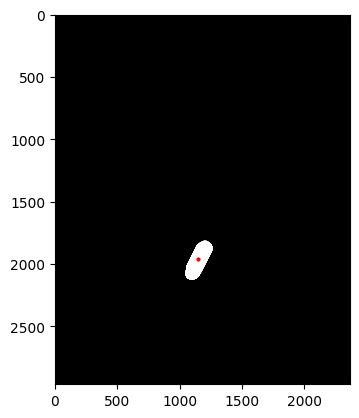

In [79]:
# Siyah beyaz görüntüyü yükleme
PATH='mask.png'
img = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# Beyaz piksellerin konumlarını bulma
pixel_list, center_point = find_white_pixels(PATH)

# Görüntüyü çizme
plt.imshow(img, cmap='gray')

# Beyaz piksellerin koordinatlarını beyaz noktalara çevirme ve çizme
if len(pixel_list) > 0:
    x_coords, y_coords = zip(*pixel_list)
    plt.plot(y_coords, x_coords, 'wo')

# Beyaz noktaların ortasına küçük bir daire çizme ve çizme
if center_point:
    plt.plot(center_point[0],center_point[1], 'ro', markersize=2)

# Görüntüyü gösterme
plt.show()


In [10]:
#Dairenin merkezini bulma

import cv2
import numpy as np

# Siyah bir arkaplan oluşturma
height, width = 512, 512
img = np.zeros((height, width), dtype=np.uint8)

# Beyaz bir daire çizme
center = (int(width/2), int(height/2))
radius = 5
color = (255, 255, 255)
thickness = -1
img = cv2.circle(img, center, radius, color, thickness)
cv2.imwrite("beyaz_daire.png", img)

True

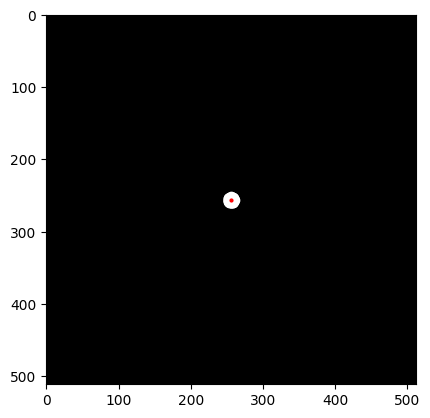

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Siyah beyaz görüntüyü yükleme
PATH='beyaz_daire.png'
img = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# Beyaz piksellerin konumlarını bulma
pixel_list, center_point = find_white_pixels(PATH)

# Görüntüyü çizme
plt.imshow(img, cmap='gray')

# Beyaz piksellerin koordinatlarını beyaz noktalara çevirme ve çizme
if len(pixel_list) > 0:
    x_coords, y_coords = zip(*pixel_list)
    plt.plot(y_coords, x_coords, 'wo')

# Beyaz noktaların ortasına küçük bir daire çizme ve çizme
if center_point:
    plt.plot(center_point[1], center_point[0], 'ro', markersize=2)

# Görüntüyü gösterme
plt.show()


In [22]:
import cv2
import numpy as np

# Siyah bir arkaplan oluşturma
height, width = 512, 512
img = np.zeros((height, width), dtype=np.uint8)

# Yaklaşık olarak bir daire şeklinde beyaz piksellerin konumlarını oluşturma
center = (int(width/2), int(height/2))
radius = 1
points = []
for i in range(10):
    angle = np.deg2rad(i)
    x = center[0] + int(radius * np.cos(angle)) + np.random.randint(-10, 10)
    y = center[1] + int(radius * np.sin(angle)) + np.random.randint(-10, 10)
    points.append((x, y))

# Beyaz pikselleri çizme
for point in points:
    img[point[1], point[0]] = 255

cv2.imwrite("beyaz_pikseller.png", img)


True

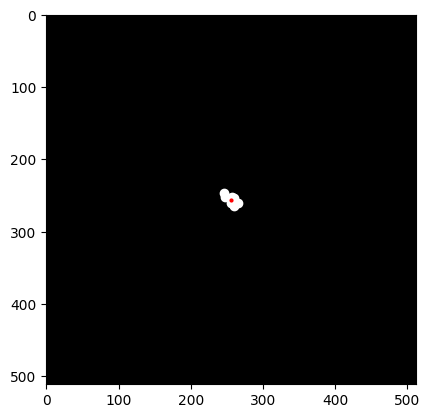

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Siyah beyaz görüntüyü yükleme
PATH='beyaz_pikseller.png'
img = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# Beyaz piksellerin konumlarını bulma
pixel_list, center_point = find_white_pixels(PATH)

# Görüntüyü çizme
plt.imshow(img, cmap='gray')

# Beyaz piksellerin koordinatlarını beyaz noktalara çevirme ve çizme
if len(pixel_list) > 0:
    x_coords, y_coords = zip(*pixel_list)
    plt.plot(y_coords, x_coords, 'wo')

# Beyaz noktaların ortasına küçük bir daire çizme ve çizme
if center_point:
    plt.plot(center_point[1], center_point[0], 'ro', markersize=2)

# Görüntüyü gösterme
plt.show()
